<a href="https://colab.research.google.com/github/Srishti07-ai/deep_learning_project/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install kaggle --upgrade


In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 95% 1.01G/1.06G [00:07<00:00, 71.4MB/s]
100% 1.06G/1.06G [00:07<00:00, 145MB/s] 


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    validation_split = 0.2,
    subset = 'training',
    seed=123,
    batch_size = 32,
    image_size = (128,128)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    validation_split = 0.2,
    subset = 'validation',
    seed=123,
    batch_size = 32,
    image_size = (128,128)
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


In [16]:
# Normalize
def process(image,label):
    image = tf.cast(image/127. ,tf.float32)
    return image,label

train_ds = train_ds.map(process).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.map(process).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
#Data Augmentation
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

In [26]:
# create CNN model
model = Sequential([
    data_augmentation,
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Training
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(train_ds, epochs=15, validation_data=validation_ds, callbacks=[early_stop, checkpoint])

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5371 - loss: 1.1885
Epoch 1: val_accuracy improved from -inf to 0.59200, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 851s 2s/step - accuracy: 0.5371 - loss: 1.1879 - val_accuracy: 0.5920 - val_loss: 0.6388
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5923 - loss: 0.6641
Epoch 2: val_accuracy improved from 0.59200 to 0.62200, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 828s 2s/step - accuracy: 0.5923 - loss: 0.6641 - val_accuracy: 0.6220 - val_loss: 0.6487
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6290 - loss: 0.6379
Epoch 3: val_accuracy improved from 0.62200 to 0.66400, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 831s 2s/step - accuracy: 0.6290 - loss: 0.6379 - val_accuracy: 0.6640 - val_loss: 0.6085
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6710 - loss: 0.6056
Epoch 4: val_accuracy improved from 0.66400 to 0.72700, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 873s 2s/step - accuracy: 0.6710 - loss: 0.6056 - val_accuracy: 0.7270 - val_loss: 0.5336
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7096 - loss: 0.5611
Epoch 5: val_accuracy did not improve from 0.72700
500/500 ━━━━━━━━━━━━━━━━━━━━ 853s 2s/step - accuracy: 0.7096 - loss: 0.5611 - val_accuracy: 0.7230 - val_loss: 0.5604
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7279 - loss: 0.5437
Epoch 6: val_accuracy improved from 0.72700 to 0.75700, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.7279 - loss: 0.5437 - val_accuracy: 0.7570 - val_loss: 0.5149
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7513 - loss: 0.5075
Epoch 7: val_accuracy did not improve from 0.75700
500/500 ━━━━━━━━━━━━━━━━━━━━ 856s 2s/step - accuracy: 0.7513 - loss: 0.5075 - val_accuracy: 0.7450 - val_loss: 0.5093
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7616 - loss: 0.4971
Epoch 8: val_accuracy did not improve from 0.75700
500/500 ━━━━━━━━━━━━━━━━━━━━ 859s 2s/step - accuracy: 0.7616 - loss: 0.4971 - val_accuracy: 0.7100 - val_loss: 0.5604
Epoch 9/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7776 - loss: 0.4678
Epoch 9: val_accuracy did not improve from 0.75700
500/500 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.7776 - loss: 0.4678 - val_accuracy: 0.7390 - val_loss: 0.7040


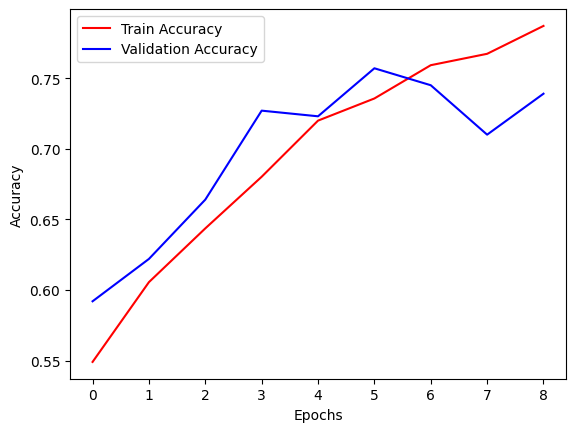

In [30]:
#Training vs Validation accuracy
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
#Evaluation
val_loss, val_acc = model.evaluate(validation_ds)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 584ms/step - accuracy: 0.7447 - loss: 0.5239
Validation Accuracy: 75.70%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

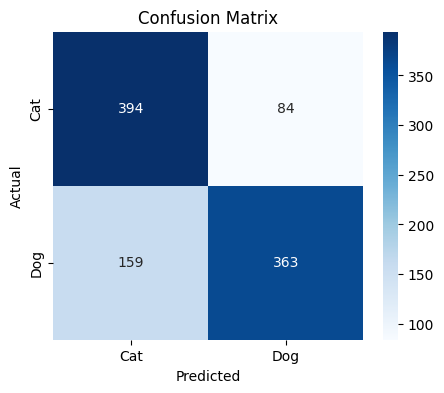

Classification Report:

              precision    recall  f1-score   support

         Cat       0.71      0.82      0.76       478
         Dog       0.81      0.70      0.75       522

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



In [32]:
#Confusion matrix & Classification Report
y_true, y_pred = [], []

for images, labels in validation_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32")
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat","Dog"], yticklabels=["Cat","Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Cat","Dog"]))